# Gathering data
## 1. Twitter archive file

In [2]:
#Import all packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from functools import reduce
from datetime import datetime
import tweepy 
import json 
import re
import seaborn as sns

# pandas settings
pd.set_option('display.max_colwidth', -1)

In [3]:
# load twitter archive
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")
# use tweet id column as index
twitter_archive.set_index("tweet_id", inplace = True)

In [4]:
# display few lines
twitter_archive.head()

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [5]:
# Explor a summary of the DataFrame
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 16 columns):
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), object(10)
memory usa

## 2. Tweet image prediction

The tweet image predictions: i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [6]:
#URL downloaded programatically 
# get file with the image predictions
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
with open('image-predictions.tsv' , 'wb') as file:
    predictions = requests.get(url)
    file.write(predictions.content)

# load image predictions
image_prediction = pd.read_csv('image-predictions.tsv', sep = '\t')
# use tweet id column as index
image_prediction.set_index("tweet_id", inplace = True)
# display few lines
image_prediction.head()

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## 3. Twitter API File

Twitter API file contains tweet id, favorite count and retweet count. Data was provided by Udacity, downloaded manually then will be loaded from the tweet-json.txt file into a pandas data frame

In [7]:

# load twitter API data
with open('tweet-json.txt') as f:
    twitter_api = pd.DataFrame((json.loads(line) for line in f), columns = ['id', 'favorite_count', 'retweet_count'])

# change column names
twitter_api.columns = ['tweet_id', 'favorites', 'retweets']
# use tweet id column as index
twitter_api.set_index('tweet_id', inplace = True)
# display few lines
twitter_api.head()

,favorites,retweets
tweet_id,,
892420643555336193,39467,8853
892177421306343426,33819,6514
891815181378084864,25461,4328
891689557279858688,42908,8964
891327558926688256,41048,9774


# Assessing data

Assess data visually as well as programmatically using pandas for quality and tidiness issues.

In [8]:
# display sample of data
twitter_archive.sample(5)

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,
705223444686888960,NaN,NaN,2016-03-03 02:49:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bode. He's a heavy sleeper. 9/10 https://t.co/YMkxhGWUqv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705223444686888960/photo/1,9,10,Bode,None,None,None,None
733482008106668032,NaN,NaN,2016-05-20 02:18:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Ello this is dog how may I assist"" ...10/10 https://t.co/jeAENpjH7L",NaN,NaN,NaN,https://twitter.com/dog_rates/status/733482008106668032/photo/1,10,10,None,None,None,None,None
678446151570427904,NaN,NaN,2015-12-20 05:25:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Touching scene here. Really stirs up the emotions. The bond between father &amp; son. So beautiful. 10/10 for both pups https://t.co/AJWJHov5gx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678446151570427904/photo/1,10,10,None,None,None,None,None
670442337873600512,NaN,NaN,2015-11-28 03:21:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Koda. He's large. Looks very soft. Great bangs. Powerful owner. 11/10 would pet the hell out of https://t.co/mzPoS9wCqp,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670442337873600512/photo/1,11,10,Koda,None,None,None,None
870374049280663552,NaN,NaN,2017-06-01 20:18:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She really likes the planet. Would hate to see willful ignorance and the denial of fairly elemental science destroy it. 13/10 https://t.co/T1xlgaPujm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/870374049280663552/photo/1,13,10,Zoey,None,None,None,None


In [9]:
# print a summary of a DataFrame
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 16 columns):
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), object(10)
memory usa

In [10]:
# check if ids are unique
twitter_archive.index.is_unique

True

In [11]:
# check number of replies
np.isfinite(twitter_archive.in_reply_to_status_id).sum()

78

In [12]:
# check number of retweets
np.isfinite(twitter_archive.retweeted_status_id).sum()

181

In [13]:
# check name of dog
twitter_archive.name.value_counts()

None            745
a               55 
Charlie         12 
Oliver          11 
Cooper          11 
Lucy            11 
Penny           10 
Lola            10 
Tucker          10 
Winston         9  
Bo              9  
Sadie           8  
the             8  
Toby            7  
Bailey          7  
Daisy           7  
Buddy           7  
an              7  
Stanley         6  
Bella           6  
Oscar           6  
Milo            6  
Scout           6  
Jack            6  
Leo             6  
Koda            6  
Dave            6  
Rusty           6  
Jax             6  
Sammy           5  
               ..  
Derby           1  
Kendall         1  
Ralphus         1  
Godzilla        1  
Laika           1  
Colin           1  
Lipton          1  
Goose           1  
Maisey          1  
Peanut          1  
Petrick         1  
Cora            1  
unacceptable    1  
Mack            1  
Mojo            1  
Arnold          1  
Bubba           1  
Jim             1  
Heinrich        1  


In [14]:
# check if dogs have more than one category assigned
categories = ['doggo', 'floofer', 'pupper', 'puppo']

for category in categories:
    twitter_archive[category] = twitter_archive[category].apply(lambda x: 0 if x == 'None' else 1)

twitter_archive['number_categories'] = twitter_archive.loc[:,categories].sum(axis = 1)

In [15]:
# dogs categories
twitter_archive['number_categories'].value_counts()

0    1976
1    366 
2    14  
Name: number_categories, dtype: int64

In [16]:
# check rating denominator
twitter_archive.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [17]:
# check ratings with denominator greather than 10
twitter_archive[twitter_archive.rating_denominator > 10][['text', 'rating_denominator']]

,text,rating_denominator
tweet_id,,
832088576586297345,@docmisterio account started on 11/15/15,15
820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,70
775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",11
758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,150
740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11
731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170
722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,20
716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50
713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,90


In [18]:
# check rating numerator
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [19]:
# check for any float ratings in the text column

with pd.option_context('max_colwidth', 200):
    display(twitter_archive[twitter_archive['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['text', 'rating_numerator', 'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.


,text,rating_numerator,rating_denominator
tweet_id,,,
883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [20]:
# check expanded urls
twitter_archive[~twitter_archive.expanded_urls.str.startswith(('https://twitter.com','http://twitter.com', 'https://vine.co'), na=False)].sample(3)[['text','expanded_urls']]

,text,expanded_urls
tweet_id,,
835264098648616962,Meet Lola. Her hobbies include being precious af and using her foot as a toothbrush. 12/10 Lola requests your help\n\nhttps://t.co/FYFyHh7rir https://t.co/IiB7ggduoU,"https://www.gofundme.com/lolas-life-saving-surgery-funds,https://twitter.com/dog_rates/status/835264098648616962/photo/1,https://twitter.com/dog_rates/status/835264098648616962/photo/1"
838085839343206401,@bragg6of8 @Andy_Pace_ we are still looking for the first 15/10,NaN
811647686436880384,PUPDATE: I've been informed that Augie was actually bringing his family these flowers when he tripped. Very good boy. Pupgraded to 11/10,NaN


In [21]:
# check for two or more urls in the expanded urls
twitter_archive[twitter_archive.expanded_urls.str.contains(',', na = False)].expanded_urls.count()

639

# Quality & Tidiness Issues in twitter_archive
   * Delete columns that won't be used for analysis.
   * The timestamp has an incorrect datatype - is an object, should be DateTime.
   * some of the gathered tweets are replies and should be removed.
   * some of the gathered tweets are retweets.
   * Dog 'stage' classification (doggo, floofer, pupper or puppo) should be one column.
   * some dogs have more than one category assigned.
   * Correct denominators other than 10.
   * float ratings have been incorrectly read from the text of tweet.
   * we have 639 expanded urls which contain more than one url address.

# Assess: Image Predictions

In [22]:
# display sample of data
image_prediction.sample(10)

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
888554962724278272,https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg,3,Siberian_husky,0.700377,True,Eskimo_dog,0.166511,True,malamute,0.111411,True
798340744599797760,https://pbs.twimg.com/media/CrXhIqBW8AA6Bse.jpg,1,papillon,0.533180,True,collie,0.192031,True,Border_collie,0.121626,True
822610361945911296,https://pbs.twimg.com/media/C2p_wQyXEAELtvS.jpg,1,cocker_spaniel,0.664487,True,Norfolk_terrier,0.075089,True,Norwich_terrier,0.059644,True
794205286408003585,https://pbs.twimg.com/media/CwWVe_3WEAAHAvx.jpg,3,pedestal,0.662660,False,fountain,0.294827,False,brass,0.020371,False
672264251789176834,https://pbs.twimg.com/media/CVRcxJ-WsAAXOhO.jpg,1,Chihuahua,0.609860,True,teddy,0.068134,False,Norwich_terrier,0.059227,True
666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
785533386513321988,https://pbs.twimg.com/media/CubGchjXEAA6gpw.jpg,2,miniature_pinscher,0.436023,True,black-and-tan_coonhound,0.258049,True,Rottweiler,0.145231,True
700151421916807169,https://pbs.twimg.com/media/CbdwATgWwAABGID.jpg,1,tennis_ball,0.328236,False,Italian_greyhound,0.176838,True,Staffordshire_bullterrier,0.134080,True
775085132600442880,https://pbs.twimg.com/media/CsGnz64WYAEIDHJ.jpg,1,chow,0.316565,True,golden_retriever,0.241929,True,Pomeranian,0.157524,True


In [23]:
# print a summary of a DataFrame
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 666020888022790149 to 892420643555336193
Data columns (total 11 columns):
jpg_url    2075 non-null object
img_num    2075 non-null int64
p1         2075 non-null object
p1_conf    2075 non-null float64
p1_dog     2075 non-null bool
p2         2075 non-null object
p2_conf    2075 non-null float64
p2_dog     2075 non-null bool
p3         2075 non-null object
p3_conf    2075 non-null float64
p3_dog     2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 152.0+ KB


In [24]:
# Check jpg_url for duplicates
sum(image_prediction.jpg_url.duplicated())

66

In [25]:
# check jpg_url to confirm if it contains only jpg and png images
image_prediction[~image_prediction.jpg_url.str.endswith(('.jpg', '.png'), na = False)].jpg_url.count()

0

In [26]:
image_prediction.img_num.value_counts()

1    1780
2    198 
3    66  
4    31  
Name: img_num, dtype: int64

In [27]:
# check 1st prediction
image_prediction.p1.sample(3)

tweet_id
668902994700836864    Brittany_spaniel
828650029636317184    golden_retriever
881268444196462592    tusker          
Name: p1, dtype: object

In [28]:
# check dog predictions
image_prediction.p1_dog.count()

2075

# Quality & Tidiness Issues in Image Predictions

   * the dataset has 2075 entries, while twitter archive dataset has 2356 entries.
   * column names are confusing and do not give much information about the content.
   * dog breeds contain underscores, and have different case formatting.
   * only 2075 images have been classified as dog images for top prediction.
   * 66 jpg_url duplicates were found.
   * dataset should be merged with the twitter archive dataset.

# Assess: Twitter API Data

In [29]:
# display sample of data
twitter_api.sample(3)

,favorites,retweets
tweet_id,,
757400162377592832,16743,7759
820446719150292993,0,2980
719991154352222208,5281,1979


In [30]:
# print a summary of a DataFrame
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 892420643555336193 to 666020888022790149
Data columns (total 2 columns):
favorites    2354 non-null int64
retweets     2354 non-null int64
dtypes: int64(2)
memory usage: 55.2 KB


In [31]:
# check if ids are unique
twitter_archive.index.is_unique

True

# Quality & Tidiness Issues in Twitter API Data
   * twitter archive dataset has 2356 entries, while twitter API data has 2354.
   * dataset should be merged with the twitter archive dataset.

# Cleaning Data

Using pandas, clean the quality and tidiness issues identified in the Assessing Data section.

## Clean: Twitter Archive Data

In [32]:
# create a copy of twitter archive dataset
twitter_archive_clean = twitter_archive.copy()

In [33]:
# display sample of data
twitter_archive_clean.sample(5)

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,number_categories
tweet_id,,,,,,,,,,,,,,,,,
707995814724026368,NaN,NaN,2016-03-10 18:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Farfle. He lost his back legs during the Battle of Gettysburg. Goes 0-60 in 4.3 seconds (damn) 12/10 hero af https://t.co/NiQQWzIzzq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707995814724026368/photo/1,12,10,Farfle,0,0,0,0,0
876484053909872640,NaN,NaN,2017-06-18 16:57:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Benedict. He wants to thank you for this delightful urban walk. Hopes you know he loves you. 13/10 super duper good boy https://t.co/26BXueUgbs,NaN,NaN,NaN,https://twitter.com/dog_rates/status/876484053909872640/photo/1,13,10,Benedict,0,0,0,0,0
683834909291606017,NaN,NaN,2016-01-04 02:18:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we see a faulty pupper. Might need to replace batteries. Try turning off &amp; back on again. 9/10 would still pet https://t.co/O1E4AtHVxO,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683834909291606017/video/1,9,10,None,0,0,1,0,1
784183165795655680,NaN,NaN,2016-10-07 00:06:50 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Reginald. He's one magical puppo. Aerodynamic af. 12/10 would catch https://t.co/t0cEeRbcXJ,NaN,NaN,NaN,https://vine.co/v/5ghHLBMMdlV,12,10,Reginald,0,0,0,1,1
836753516572119041,NaN,NaN,2017-03-01 01:42:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Meera. She just heard about taxes and how much a doghouse in a nice area costs. Not pupared to be a doggo anymore. 12/10 https://t.co/GZmNEdyoJY,NaN,NaN,NaN,https://twitter.com/dog_rates/status/836753516572119041/photo/1,12,10,Meera,1,0,0,0,1


# Define

Some of the gathered tweets are replies and retweets

   * remove retweets data from the dataset
   * remove columns with retweet and replies information

# code

In [34]:
# display shape of dataframe
twitter_archive_clean.shape

(2356, 17)

In [35]:
# drop retweets                                                 
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]

In [36]:
#TEST
print(sum(twitter_archive_clean.retweeted_status_user_id.value_counts()))

0


In [37]:
# display all columns
twitter_archive_clean.columns

Index(['in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source',
       'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'number_categories'],
      dtype='object')

In [38]:
# drop unnecessary columns
twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
           'retweeted_status_user_id','retweeted_status_timestamp'], axis = 1, inplace = True)

In [39]:
# Test
# display shape of dataframe
twitter_archive_clean.shape

(2175, 12)

In [40]:
# Test
# display cleaned dataset
twitter_archive_clean.sample(3)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,number_categories
tweet_id,,,,,,,,,,,,
839239871831150596,2017-03-07 22:22:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Odie. He's big. 13/10 would attempt to ride https://t.co/JEXB9RwBmm,"https://twitter.com/dog_rates/status/839239871831150596/photo/1,https://twitter.com/dog_rates/status/839239871831150596/photo/1,https://twitter.com/dog_rates/status/839239871831150596/photo/1",13,10,Odie,0,0,0,0,0
674082852460433408,2015-12-08 04:27:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Sagitariot Baklava mix. Loves her new hat. 11/10 radiant pup https://t.co/Bko5kFJYUU,https://twitter.com/dog_rates/status/674082852460433408/photo/1,11,10,a,0,0,0,0,0
708149363256774660,2016-03-11 04:35:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jebberson. He's the reigning hide and seek world champion. 10/10 hasn't lost his touch https://t.co/VEFkvWCoHF,https://twitter.com/dog_rates/status/708149363256774660/photo/1,10,10,Jebberson,0,0,0,0,0


# Define

   * Dog classification (doggo, floofer, pupper or puppo) should be one column.
   * Some dogs have more than one category assigned.

# code

In [41]:
# display sample of dataframe
twitter_archive_clean.head(3)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,number_categories
tweet_id,,,,,,,,,,,,
892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,0,0,0,0,0
892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,0,0,0,0,0
891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,0,0,0,0,0


In [42]:
# read dog types from text column
for index, column in twitter_archive_clean.iterrows():
    for word in ['puppo', 'pupper', 'doggo', 'floofer']:
        if word.lower() in str(twitter_archive_clean.loc[index, 'text']).lower():
            twitter_archive_clean.loc[index, 'dog_type'] = word.title()
            
# drop old columns
twitter_archive_clean.drop(['puppo',
                       'pupper',
                       'doggo',
                       'floofer'],
                      axis=1, inplace=True)

In [43]:
# Test
# display sample of fixed data
twitter_archive_clean.sample(3)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,number_categories,dog_type
tweet_id,,,,,,,,,
780601303617732608,2016-09-27 02:53:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Hercules. He can have whatever he wants for the rest of eternity. 12/10 would snug passionately https://t.co/mH0IOyFdIG,https://twitter.com/dog_rates/status/780601303617732608/photo/1,12,10,Hercules,0,NaN
849051919805034497,2017-04-04 00:12:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Kevin. Kevin doesn't give a single h*ck. Will sit in the fountain if he wants to. 13/10 churlish af https://t.co/r6GjO6MbZz,https://twitter.com/dog_rates/status/849051919805034497/photo/1,13,10,Kevin,0,NaN
749064354620928000,2016-07-02 02:17:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Winston. He's pupset because I forgot to mention that it's Canada Day today. 11/10 please forgive me Winston https://t.co/xEY8dbJxnF,"https://twitter.com/dog_rates/status/749064354620928000/photo/1,https://twitter.com/dog_rates/status/749064354620928000/photo/1",11,10,Winston,0,NaN


# Define

The timestamp has an incorrect datatype - is an object, should be DateTime

   * convert to datetime.

# code

In [44]:
# convert to datetime
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

In [45]:
# Test
# display dataset types
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 892420643555336193 to 666020888022790149
Data columns (total 9 columns):
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
number_categories     2175 non-null int64
dog_type              385 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 249.9+ KB


# Define

Float ratings have been incorrectly read from the text of tweet

   * gather correct rating when rating is a fraction.

# code

In [46]:
# Disply a sample before correction
twitter_archive_clean[twitter_archive_clean.text.str.contains(r'\d+\.\d+\/\d+')][['text','rating_denominator', 'rating_numerator']].sample(3)

,text,rating_denominator,rating_numerator
tweet_id,,,
786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",10,75
681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,10,5
778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,10,27


In [47]:

# convert both columns to floats
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype(float)
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype(float)

# find columns with fractions
fraction_ratings = twitter_archive_clean[twitter_archive_clean.text.str.contains(r'\d+\.\d+\/\d+', na = False)].index

# extract correct rating and replace incorrect one
for index in fraction_ratings:
    rating = re.search('\d+\.\d+\/\d+', twitter_archive_clean.loc[index,:].text).group(0)
    twitter_archive_clean.at[index,'rating_numerator'], twitter_archive_clean.at[index,'rating_denominator'] = rating.split('/')

In [48]:
# display sample of fixed data
twitter_archive_clean.loc[fraction_ratings,:][['text','rating_denominator', 'rating_numerator']].sample(3)

,text,rating_denominator,rating_numerator
tweet_id,,,
778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,10.0,11.27
786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",10.0,9.75
680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,10.0,11.26


# Define

Denominator of some ratings is not 10. Numerator of some ratings is greater than 10. The fact that the rating numerators are greater than the denominators does not need to be cleaned, however I will introduce a normalized rating which will be easier to plot.

   * fix incorrectly read ratings
   * add normalized rating

# code

In [49]:
# save index of tweets with denominator greater than 10
high_denominator = twitter_archive[twitter_archive.rating_denominator > 10].index

# display sample of data with denominator greater than 10
twitter_archive_clean.loc[high_denominator,:][['text','rating_denominator', 'rating_numerator']].sample(3)

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,text,rating_denominator,rating_numerator
tweet_id,,,
677716515794329600,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,120.0,144.0
697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,40.0,44.0
682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,11.0,7.0


In [50]:
# fix rating manually for tweets for which rating was read incorrectly
twitter_archive_clean.loc[832088576586297345, 'rating_denominator'] = 0
twitter_archive_clean.loc[832088576586297345, 'rating_numerator'] = 0

twitter_archive_clean.loc[775096608509886464, 'rating_denominator'] = 10
twitter_archive_clean.loc[775096608509886464, 'rating_numerator'] = 14

twitter_archive_clean.loc[740373189193256964, 'rating_denominator'] = 10
twitter_archive_clean.loc[740373189193256964, 'rating_numerator'] = 14

twitter_archive_clean.loc[722974582966214656, 'rating_denominator'] = 10
twitter_archive_clean.loc[722974582966214656, 'rating_numerator'] = 13

twitter_archive_clean.loc[716439118184652801, 'rating_denominator'] = 10
twitter_archive_clean.loc[716439118184652801, 'rating_numerator'] = 11

twitter_archive_clean.loc[682962037429899265, 'rating_denominator'] = 10
twitter_archive_clean.loc[682962037429899265, 'rating_numerator'] = 10

In [51]:
# display sample of fixed rating
twitter_archive_clean.loc[high_denominator,:][['text','rating_denominator', 'rating_numerator']].sample(3)

,text,rating_denominator,rating_numerator
tweet_id,,,
682808988178739200,"I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible",16.0,20.0
740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",10.0,14.0
775096608509886464,NaN,10.0,14.0


In [52]:
# add normalized rating
twitter_archive_clean['rating'] = twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator']

In [53]:
# Test
# display sample of data with the new column
twitter_archive_clean[['text','rating_denominator', 'rating_numerator', 'rating']].sample(5)

,text,rating_denominator,rating_numerator,rating
tweet_id,,,,
672231046314901505,Exotic underwater dog here. Very shy. Wont return tennis balls I toss him. Never been petted. 5/10 I bet he's soft https://t.co/WH7Nzc5IBA,10.0,5.0,0.5
700143752053182464,When it's Janet from accounting's birthday but you can't eat the cake cuz it's chocolate. 10/10 hang in there pupper https://t.co/Fbdr5orUrJ,10.0,10.0,1.0
715704790270025728,This is Bentley. He gives kisses back. 11/10 precious af (vid by @emmaallen25) https://t.co/9PnKkKzoUp,10.0,11.0,1.1
678341075375947776,This pupper likes tape. 12/10 https://t.co/cSp6w5GWgm,10.0,12.0,1.2
666094000022159362,This appears to be a Mongolian Presbyterian mix. Very tired. Tongue slip confirmed. 9/10 would lie down with https://t.co/mnioXo3IfP,10.0,9.0,0.9


# Define

We have 639 expanded urls which contain more than one url address and 59 missing expanded urls

   * build correct links by using tweet id

# code

In [54]:
# fix expanded urls
for index, column in twitter_archive_clean.iterrows():
    twitter_archive_clean.loc[index, 'expanded_urls'] = 'https://twitter.com/dog_rates/status/' + str(index)
    
# Test
twitter_archive_clean.sample(3)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,number_categories,dog_type,rating
tweet_id,,,,,,,,,,
859851578198683649,2017-05-03 19:26:06,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Trooper. He picks pup recyclables that have blown out of bins in the neighborhood and puts them back. 13/10 environmentally savvy af https://t.co/BqSttrTuIl,https://twitter.com/dog_rates/status/859851578198683649,13.0,10.0,Trooper,0.0,NaN,1.3
667443425659232256,2015-11-19 20:44:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Exotic dog here. Long neck. Weird paws. Obsessed with bread. Waddles. Flies sometimes (wow!). Very happy dog. 6/10 https://t.co/rqO4I3nf2N,https://twitter.com/dog_rates/status/667443425659232256,6.0,10.0,None,0.0,NaN,0.6
818145370475810820,2017-01-08 17:20:31,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Autumn. Her favorite toy is a cheeseburger. She takes it everywhere. 11/10 https://t.co/JlPug12E5Z,https://twitter.com/dog_rates/status/818145370475810820,11.0,10.0,Autumn,0.0,NaN,1.1


# Clean: Image Predictions Data

In [55]:
# create a copy of dataset
image_prediction_clean = image_prediction.copy()

In [56]:
# display sample of data
image_prediction_clean.sample(3)

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
669359674819481600,https://pbs.twimg.com/media/CUoLEG3XAAE65I0.jpg,1,Labrador_retriever,0.367818,True,German_short-haired_pointer,0.280642,True,Chesapeake_Bay_retriever,0.184246,True
703407252292673536,https://pbs.twimg.com/media/CcMBJODUsAI5-A9.jpg,1,doormat,0.201058,False,turnstile,0.088583,False,carton,0.082924,False
892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


# Define

Columns names are confusing and do not give much information about the content.

   * Change column names to more descriptive ones.

# code

In [57]:
# display current labels
image_prediction_clean.columns

Index(['jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [58]:
# change labels
image_prediction_clean.columns = ['image_url', 
                            'img_number', 
                            '1st_prediction',
                            '1st_prediction_confidence',
                            '1st_prediction_isdog',
                            '2nd_prediction',
                            '2nd_prediction_confidence',
                            '2nd_prediction_isdog',
                            '3rd_prediction',
                            '3rd_prediction_confidence',
                            '3rd_prediction_isdog']

In [59]:
# display new labels
image_prediction_clean.columns

Index(['image_url', 'img_number', '1st_prediction',
       '1st_prediction_confidence', '1st_prediction_isdog', '2nd_prediction',
       '2nd_prediction_confidence', '2nd_prediction_isdog', '3rd_prediction',
       '3rd_prediction_confidence', '3rd_prediction_isdog'],
      dtype='object')

# Define

Dog breeds contain underscores, and have different case formatting

   * Replace underscores with whitespace
   * Capitalize the first letter of each word

# code

In [60]:
# columns with dog breed
dog_breed_cols = ['1st_prediction', '2nd_prediction', '3rd_prediction']

# remove underscore and capitalize the first letter of each word 
for column in dog_breed_cols:
    image_prediction_clean[column] = image_prediction_clean[column].str.replace('_', ' ').str.title()

In [61]:
# display sample of changes
image_prediction_clean[dog_breed_cols].sample(5)

,1st_prediction,2nd_prediction,3rd_prediction
tweet_id,,,
673636718965334016,Wombat,Corn,Pug
677662372920729601,Cowboy Hat,Trench Coat,Cloak
694905863685980160,Bow Tie,Fur Coat,Black-Footed Ferret
672997845381865473,Chow,Pomeranian,Koala
689289219123089408,Snowmobile,Assault Rifle,Rifle


# Define

Drop 66 image_url duplicated

# code

In [62]:
#disply jpg_url duplicates 
sum(image_prediction_clean.image_url.duplicated())

66

In [63]:
#CODE: Delete duplicated jpg_url
image_prediction_clean = image_prediction_clean.drop_duplicates(subset=['image_url'], keep='last')

#TEST
sum(image_prediction_clean['image_url'].duplicated())

0

# Define

Only 2075 images have been classified as dog images for top prediction

If 1st predictions is not a dog breed, then use dog breed predicted in the 2nd or 3rd predicion.

# Code

In [64]:
# build function to determine dog breed
# if no breed detected, set value to NaN

def get_breed(row):
    if row['1st_prediction_isdog'] == True:
        return row['1st_prediction'], row['1st_prediction_confidence']
    if row['2nd_prediction_isdog'] == True:
        return row['2nd_prediction'], row['2nd_prediction_confidence']
    if row['3rd_prediction_isdog'] == True:
        return row['3rd_prediction'], row['3rd_prediction_confidence']
    return np.nan, np.nan

# apply function to dataset
# create new columns with data
image_prediction_clean[['breed_predicted', 'prediction_confidence']] = pd.DataFrame(image_prediction_clean.apply(lambda row: get_breed(row), axis = 1).tolist(), index = image_prediction_clean.index) 

# drop old columns
image_prediction_clean.drop(['1st_prediction',
                       '1st_prediction_confidence',
                       '1st_prediction_isdog',
                       '2nd_prediction',
                       '2nd_prediction_confidence',
                       '2nd_prediction_isdog',
                       '3rd_prediction',
                       '3rd_prediction_confidence',
                       '3rd_prediction_isdog'],
                      axis=1, inplace=True)

# drop rows without dog breed prediction
image_prediction_clean.dropna(subset = ['breed_predicted', 'prediction_confidence'], inplace = True)

In [65]:
# Test
# display sample of cleaned dataset
image_prediction_clean.sample(3)

,image_url,img_number,breed_predicted,prediction_confidence
tweet_id,,,,
757741869644341248,https://pbs.twimg.com/media/CoQKNY7XYAE_cuX.jpg,1,Old English Sheepdog,0.128899
766008592277377025,https://pbs.twimg.com/media/CqFouXOXYAAYpzG.jpg,1,Welsh Springer Spaniel,0.728153
685973236358713344,https://pbs.twimg.com/media/CYURBGoWYAAKey3.jpg,1,Siberian Husky,0.450678


# Clean: Twitter API Data

In [66]:
# display sample of data
twitter_api.sample(3)

,favorites,retweets
tweet_id,,
740699697422163968,3101,888
675489971617296384,1406,672
706166467411222528,5636,1819


The dataset looks clean so there is no need to perform cleaning tasks, except for merging it with the Twitter archive data, which is covered in the next section.



# Storing, Analyzing, and Visualizing Data

## Storing

Merge all the three datasets and Store the clean DataFrame(s) in the CSV file **twitter_archive_master.csv**

In [67]:
# join datasets
df = reduce(lambda left, right: pd.merge(left, right, on='tweet_id'), [twitter_archive_clean, image_prediction_clean, twitter_api])

In [68]:
# display new dataset
df.sample(3)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,number_categories,dog_type,rating,image_url,img_number,breed_predicted,prediction_confidence,favorites,retweets
tweet_id,,,,,,,,,,,,,,,,
704871453724954624,2016-03-02 03:30:25,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I found a forest Pipsy. 12/10 https://t.co/mIQ1KoVsmU,https://twitter.com/dog_rates/status/704871453724954624,12.0,10.0,None,0.0,NaN,1.2,https://pbs.twimg.com/media/Ccg02LiWEAAJHw1.jpg,1,Norfolk Terrier,0.689504,4585,1245
702684942141153280,2016-02-25 02:42:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lucy. She's sick of these bullshit generalizations 11/10 https://t.co/d2b5C2R0aO,https://twitter.com/dog_rates/status/702684942141153280,11.0,10.0,Lucy,0.0,NaN,1.1,https://pbs.twimg.com/media/CcBwOn0XEAA7bNQ.jpg,1,Golden Retriever,0.514085,3516,1215
838561493054533637,2017-03-06 01:26:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Walter. His owner has been watching all the Iditarod coverage and is convinced Walter can be a sled dog. 13/10 Walter isn't so sure https://t.co/0av1PEehFI,https://twitter.com/dog_rates/status/838561493054533637,13.0,10.0,Walter,0.0,NaN,1.3,https://pbs.twimg.com/media/C6MrOsEXQAENOds.jpg,1,Kelpie,0.216562,11892,1504


In [69]:
#Store the clean DataFrame in a CSV file
df.to_csv('twitter_archive_master.csv')

# Analyzing and Visualizing Data

In [70]:
# display sample of data
df.sample(3)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,number_categories,dog_type,rating,image_url,img_number,breed_predicted,prediction_confidence,favorites,retweets
tweet_id,,,,,,,,,,,,,,,,
674053186244734976,2015-12-08 02:29:37,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Stanley. Yes he is aware of the spoon's presence, he just doesn't know what he should do about it. 10/10 https://t.co/gQAMg5ypW5",https://twitter.com/dog_rates/status/674053186244734976,10.0,10.0,Stanley,0.0,NaN,1.0,https://pbs.twimg.com/media/CVq3zAaWwAA8vpk.jpg,1,Cardigan,0.984725,3576,1441
774314403806253056,2016-09-09 18:31:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I WAS SENT THE ACTUAL DOG IN THE PROFILE PIC BY HIS OWNER THIS IS SO WILD. 14/10 ULTIMATE LEGEND STATUS https://t.co/7oQ1wpfxIH,https://twitter.com/dog_rates/status/774314403806253056,14.0,10.0,None,0.0,NaN,1.4,https://pbs.twimg.com/media/Cr7q1VxWIAA5Nm7.jpg,3,Eskimo Dog,0.596045,24167,6478
671729906628341761,2015-12-01 16:37:44,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I'm just going to leave this one here as well. 13/10 https://t.co/DaD5SyajWt,https://twitter.com/dog_rates/status/671729906628341761,13.0,10.0,None,0.0,NaN,1.3,https://pbs.twimg.com/media/CVJ2yR2UwAAdCzU.jpg,1,Kuvasz,0.431469,9119,4795


In [71]:
# display basic data summary
df.describe()

,rating_numerator,rating_denominator,number_categories,rating,img_number,prediction_confidence,favorites,retweets
count,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000
mean,11.391009,10.522140,0.159287,1.081431,1.216482,0.550305,8603.169127,2555.534440
std,8.021945,7.000207,0.379266,0.187995,0.577420,0.300083,11700.108745,4301.337243
min,0.000000,2.000000,0.000000,0.000000,1.000000,0.000010,81.000000,16.000000
25%,10.000000,10.000000,0.000000,1.000000,1.000000,0.302321,2091.250000,622.250000
50%,11.000000,10.000000,0.000000,1.100000,1.000000,0.550604,4162.500000,1363.000000
75%,12.000000,10.000000,0.000000,1.200000,1.000000,0.822939,10857.250000,2992.500000
max,165.000000,150.000000,2.000000,3.428571,4.000000,0.999956,132810.000000,79515.000000


Looking at the basic statistics, we see that the rating 11/10 is the most common one. When it comes to the quality of dog breed predictions, the average confidence of ~50% suggests we might expect a lot of misclassified dogs. On the good side, the average value of favorites and retweets allow us to understand better how popular weRateDogs profile is. Average of 8603 favorites and 2555 retweets is impressive.

# Insight one
## Most common dog Breed

An interesting information is the dog breed. This information comes from the image predictions file, which we merged with the tweeter archive at Storing section. Dog breeds were generated by running images through the neural network that can classify breeds of dogs.

In [72]:
# Display the number for each dog's breed 
df['breed_predicted'].value_counts()

Golden Retriever                  143
Labrador Retriever                103
Pembroke                          94 
Chihuahua                         87 
Pug                               60 
Toy Poodle                        50 
Chow                              45 
Pomeranian                        42 
Samoyed                           38 
Malamute                          32 
Chesapeake Bay Retriever          31 
French Bulldog                    30 
Cocker Spaniel                    26 
Miniature Pinscher                24 
Eskimo Dog                        22 
German Shepherd                   21 
Siberian Husky                    20 
Staffordshire Bullterrier         20 
Shih-Tzu                          20 
Shetland Sheepdog                 19 
Maltese Dog                       19 
Beagle                            19 
Cardigan                          19 
Rottweiler                        19 
Kuvasz                            18 
Italian Greyhound                 17 
Basset      

In [73]:
# horizontal bar plot function
def plot_barh(x, y, title="", xlabel="", ylabel="", rotation=0):
    
    plt.figure(figsize=(8,5)) 


    bar_list = plt.barh(x,y, color="#3F5D7D", edgecolor="k")


    plt.title(title,
              fontsize=17)
    
    plt.xlabel(xlabel,
               fontsize=15)
    
    plt.ylabel(ylabel,
               fontsize=15)

    return plt.show()

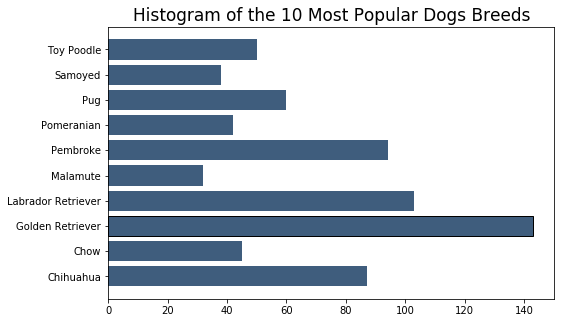

In [74]:
# plot 10 most popular dog breeds
dog_breeds = pd.DataFrame(df.breed_predicted.value_counts()[:10])

plot_barh(dog_breeds.index,
          dog_breeds.breed_predicted,
          title="Histogram of the 10 Most Popular Dogs Breeds")

**Golden Retriever, Labrador Retriever, Pembroke, and Chihuahua are the most popular dog breeds!**

# Insight 2
## Average rating among dog Breeds

In [75]:
df_dog_type_mean = df.groupby('breed_predicted').mean()

In [76]:
df_dog_type_mean.head()


,rating_numerator,rating_denominator,number_categories,rating,img_number,prediction_confidence,favorites,retweets
breed_predicted,,,,,,,,
Afghan Hound,8.000000,10.0,0.000000,0.800000,1.000000,0.513621,12191.500000,3602.5000
Airedale,9.833333,10.0,0.083333,0.983333,1.166667,0.583771,5280.833333,1393.7500
American Staffordshire Terrier,10.312500,10.0,0.187500,1.031250,1.187500,0.527359,9380.187500,2310.8125
Appenzeller,11.000000,10.0,0.000000,1.100000,1.000000,0.503665,7317.500000,1458.0000
Australian Terrier,11.500000,10.0,0.000000,1.150000,2.000000,0.307584,11127.500000,3078.5000


In [77]:
df_dog_type_sorted = df_dog_type_mean['rating'].sort_values()

df_dog_type_sorted

breed_predicted
Japanese Spaniel               0.500000
Afghan Hound                   0.800000
Soft-Coated Wheaten Terrier    0.880000
Scotch Terrier                 0.900000
Walker Hound                   0.900000
Tibetan Terrier                0.925000
Dalmatian                      0.927273
Boston Bull                    0.941667
Welsh Springer Spaniel         0.950000
Saint Bernard                  0.950000
Maltese Dog                    0.952632
Dandie Dinmont                 0.957143
Norwich Terrier                0.960000
Miniature Schnauzer            0.960000
Redbone                        0.966667
English Setter                 0.971429
Scottish Deerhound             0.975000
Rhodesian Ridgeback            0.975000
Irish Terrier                  0.980000
Airedale                       0.983333
Papillon                       0.983333
Newfoundland                   0.985714
Mexican Hairless               0.985714
Miniature Poodle               0.987500
Miniature Pinscher      

# Insight 3
## Account Popularity over Time

Account Popularity based on the numbers of Favorites and Retweets over time.

In [ ]:
d = pd.DataFrame(df.timestamp)
fig, ax = plt.subplots(figsize=(10,7))
ax.plot_date(d,df.favorites, color="#d82d2d")
ax.plot_date(d,df.retweets, color="#410d51")
ax.set_ylim([0,16000])
ax.set_title('Popularity of @WERateDogs over Time')

# Setting x and y labels.
ax.set_ylabel('Count')
ax.set_xlabel('Time')
ax.legend()


The page gained popularity over time as it is clear in the above graph. We see an upward trend in the number of favorites and retweets. We can suppose that tweets were getting more and more favorites and retweets as WeRateDog account was becoming more and more popular.

# Insight 5
## Dog Types

WeRateDogs classifies dogs into one of four stages: doggo, pupper, puppo, and floof(er).Let's check how many dogs we have for each category

In [ ]:
df.dog_type.value_counts()

In [ ]:
# bar plot function
def plot_bar(x, y, title="", xlabel="", ylabel="", rotation=0, width=0.8):
    
    plt.figure(figsize=(9,6)) 

    bar_list = plt.bar(x, y, color="#173c8c", edgecolor="k", width=width)


    plt.title(title,
              fontsize=18)
    
    plt.xlabel(xlabel,
               fontsize=15)
    
    plt.ylabel(ylabel,
               fontsize=15)

    return plt.show()

In [ ]:
# plot dog types
dog_types = pd.DataFrame(df.dog_type.value_counts())

plot_bar(dog_types.index,
         dog_types.dog_type,
         width=0.25, 
         title="Dog Types", 
         ylabel="Count")

Pupper is the most common dog category, followed by Doggo. Floofer is very rare.

# Insight 4
WeRateDogs rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc.

In [ ]:
# display basic stats
df.rating.describe()

In [ ]:
# line plot function
def plot_line(x, y, title="", xlabel="", ylabel="", marker=None, linestyle="-", xlim=None, ylim=None, xrotation=0):
    
    plt.figure(figsize=(10, 7))   

    ax = plt.subplot(111)    
    ax.spines["top"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.grid(which='major', axis='both', linestyle='--', alpha=0.5, color="#9b2e2e")

    plt.yticks(fontsize=14)    
    plt.xticks(fontsize=14, rotation=xrotation)   

    if xlim is None:
        plt.xlim()
    else:
        plt.xlim(xlim)

    if ylim is None:
        plt.ylim()
    else:
        plt.ylim(ylim)
    
    plt.plot(x, y, marker=marker, linestyle=linestyle, color="#9b2e2e")

    plt.title(title,
              fontsize=18)
    
    plt.xlabel(xlabel,
               fontsize=14)
    
    plt.ylabel(ylabel,
               fontsize=14)

    return plt.show()

In [ ]:
# plot rating over time
plot_line(df.timestamp, 
          df.rating,
          title="Rating over time", 
          ylabel="Rating", 
          marker='o', 
          linestyle='', 
          ylim=(0,1.5), 
          xrotation=90)